In [ ]:
# Import necessary libraries
import os
import numpy as np
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import zipfile

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define and extract dataset path
zip_file_path = '/content/drive/My Drive/Melanoma_Dataset/melanoma_cancer_dataset.zip'
extract_dir = '/content/melanoma_dataset'

In [ ]:
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: /content/melanoma_dataset


In [ ]:
# Updated dataset path after extraction
dataset_path = extract_dir

In [ ]:
# Data preprocessing

def input_data(folder_path, output_data):
    """Importing image data into the output_data list."""
    for dirs in os.listdir(folder_path):
        class_name = dirs  # Subdirectory names represent class labels.
        new_path = os.path.join(folder_path, class_name)
        for img in os.listdir(new_path):
            img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_GRAYSCALE)
            resize = cv.resize(img_arr, (128, 128))
            output_data.append([resize, class_name])
    return output_data

In [ ]:
train_data = input_data(os.path.join(dataset_path, 'train'), [])
test_data = input_data(os.path.join(dataset_path, 'test'), [])

In [ ]:
# Load the data into numpy arrays
train_images = []
train_labels = []
for features, labels in train_data:
    train_images.append(features)
    train_labels.append(labels)

In [ ]:
test_images = []
test_labels = []
for features, labels in test_data:
    test_images.append(features)
    test_labels.append(labels)

In [ ]:
label_enc = LabelEncoder()  # Encoding the labels
train_labels = label_enc.fit_transform(train_labels)
test_labels = label_enc.transform(test_labels)

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
train_images = train_images / 255.0  # Normalize the image pixels
test_images = test_images / 255.0

In [ ]:
train_images = np.expand_dims(train_images, axis=3)  # Add a dimension to the images
test_images = np.expand_dims(test_images, axis=3)

In [ ]:
# Print the shape and counts of numpy array
print("Shape of train_images:", train_images.shape)
print("Contents of train_images:", train_images)
print("Shape of test_images:", test_images.shape)
print("Contents of test_images:", test_images)

Shape of train_images: (9605, 128, 128, 1)
Contents of train_images: [[[[0.09411765]
   [0.11764706]
   [0.14117647]
   ...
   [0.00392157]
   [0.00392157]
   [0.00392157]]

  [[0.1254902 ]
   [0.14117647]
   [0.16470588]
   ...
   [0.00392157]
   [0.00392157]
   [0.00392157]]

  [[0.14509804]
   [0.16078431]
   [0.17647059]
   ...
   [0.00784314]
   [0.00392157]
   [0.00392157]]

  ...

  [[0.15294118]
   [0.17254902]
   [0.19607843]
   ...
   [0.09411765]
   [0.0745098 ]
   [0.03921569]]

  [[0.14117647]
   [0.15686275]
   [0.18039216]
   ...
   [0.07058824]
   [0.03137255]
   [0.02352941]]

  [[0.11764706]
   [0.1372549 ]
   [0.15686275]
   ...
   [0.04313725]
   [0.02352941]
   [0.01176471]]]


 [[[0.6745098 ]
   [0.68627451]
   [0.68627451]
   ...
   [0.64313725]
   [0.63529412]
   [0.64313725]]

  [[0.67058824]
   [0.68627451]
   [0.69803922]
   ...
   [0.61960784]
   [0.61568627]
   [0.61960784]]

  [[0.65882353]
   [0.68235294]
   [0.70196078]
   ...
   [0.61568627]
   [0.63529

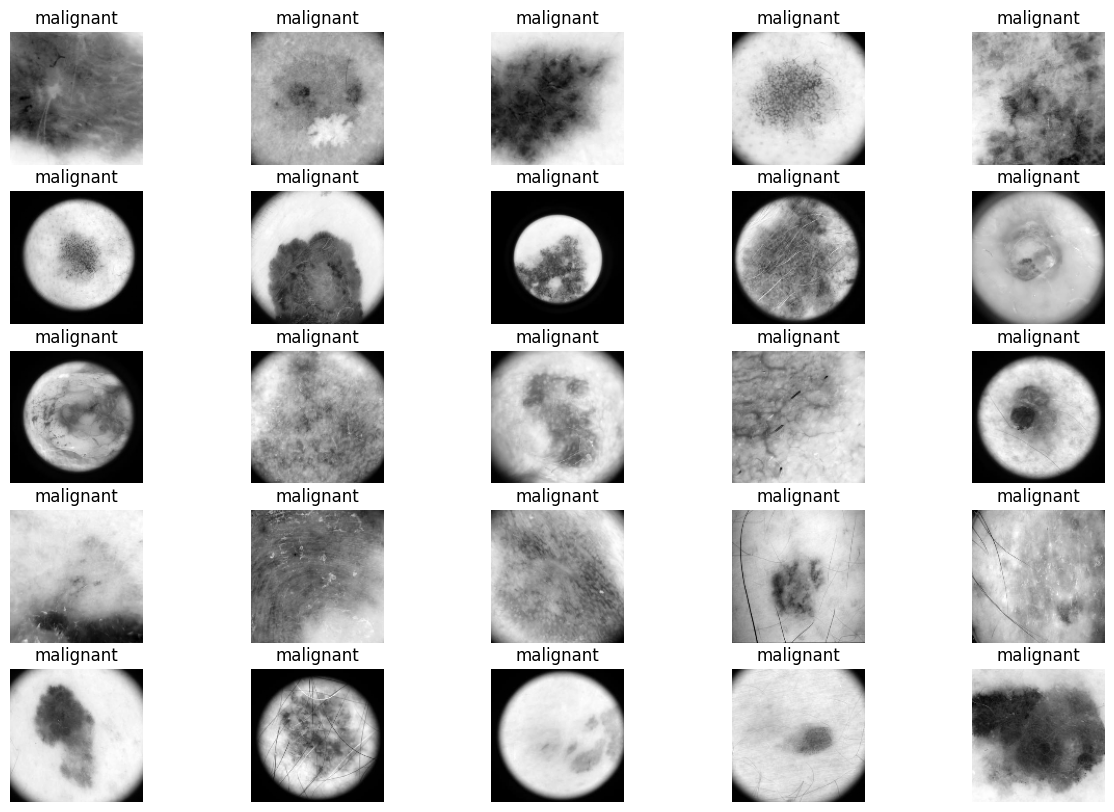

In [ ]:
# Visualize some test images
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"{label_enc.inverse_transform([test_labels[i]])[0]}")
    plt.axis("off")
plt.show()

In [ ]:
# Define the CNN model
model1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(256, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
# Train the CNN model
history1 = model1.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=30
)


Epoch 1/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6835 - loss: 0.5513 - val_accuracy: 0.8540 - val_loss: 0.3146
Epoch 2/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8399 - loss: 0.3434 - val_accuracy: 0.8710 - val_loss: 0.2866
Epoch 3/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8610 - loss: 0.3085 - val_accuracy: 0.8560 - val_loss: 0.3002
Epoch 4/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8561 - loss: 0.3046 - val_accuracy: 0.8780 - val_loss: 0.2645
Epoch 5/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8784 - loss: 0.2759 - val_accuracy: 0.8730 - val_loss: 0.2895
Epoch 6/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8838 - loss: 0.2584 - val_accuracy: 0.8860 - val_loss: 0.2665
Epoch 7/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9001 - loss: 0.2397 - val_accuracy: 0.8880 - val_loss: 0.2501
Epoch 8/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8979 - loss: 0.2360 - val

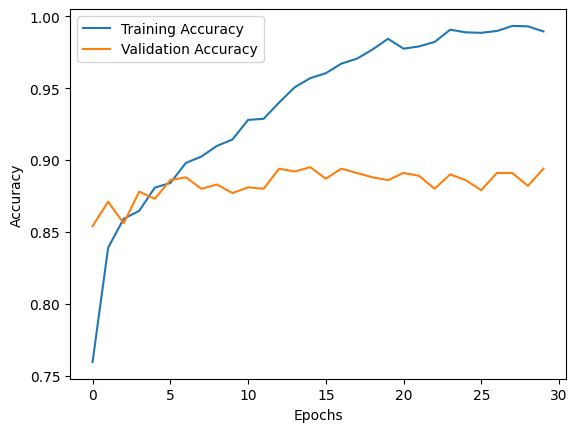

In [ ]:
# Plot accuracy
plt.plot(history1.history["accuracy"], label="Training Accuracy")
plt.plot(history1.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

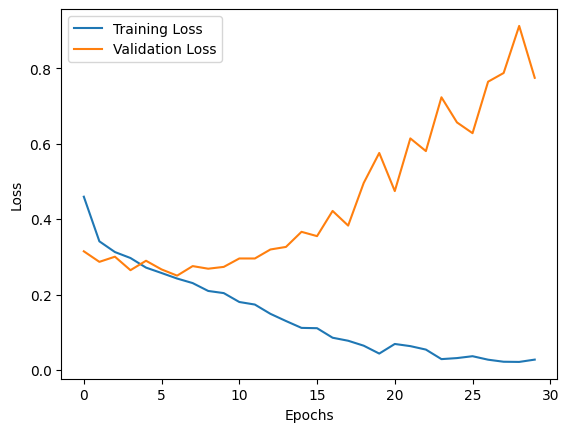

In [ ]:
# Plot loss
plt.plot(history1.history["loss"], label="Training Loss")
plt.plot(history1.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Predict and evaluate
y_pred1 = model1.predict(test_images)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
y_pred1 = (y_pred1 > 0.5).astype(int).flatten()

In [ ]:
print(classification_report(test_labels, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       500
           1       0.90      0.89      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



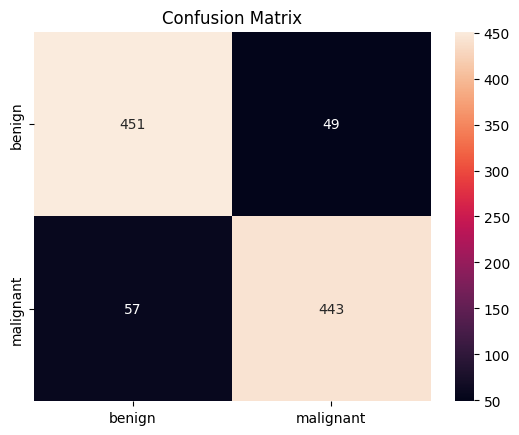

In [ ]:
sns.heatmap(confusion_matrix(test_labels, y_pred1), fmt='g', annot=True, xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Train and evaluate SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

svm_pred = svm_model.predict(test_images.reshape(test_images.shape[0], -1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       500
           1       0.82      0.82      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



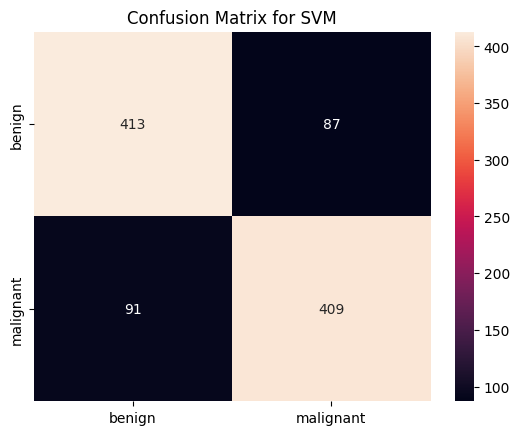

In [ ]:
print(classification_report(test_labels, svm_pred))
sns.heatmap(confusion_matrix(test_labels, svm_pred), fmt='g', annot=True, xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix for SVM")
plt.show()